In [3]:
#import librabries and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  

df= pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [9]:
#convert the data type of rate and remove /5

def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Text(0.5, 0, 'Types Of Restuarants')

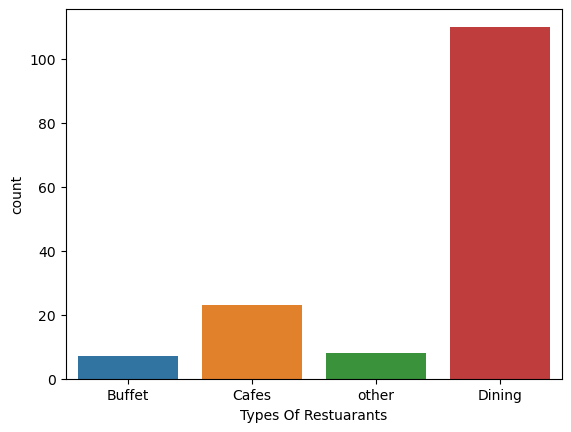

In [13]:
#types of restuarants do the majority of customers order by counting the listed in and occurence

sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types Of Restuarants")

In [14]:

#Conclusion Dining is type where customers order.


Text(0, 0.5, 'Votes')

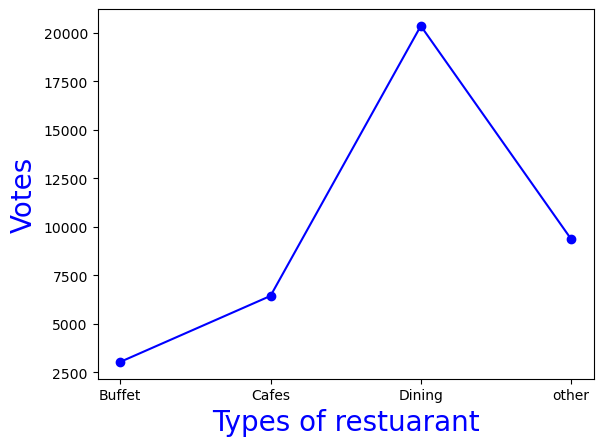

In [24]:
#how many votes has each types of resturaunt received from the customer

group_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': group_data})
plt.plot(result, c="blue", marker= "o")
plt.xlabel("Types of restuarant", c= "blue", size=20)
plt.ylabel("Votes", c="blue", size=20)

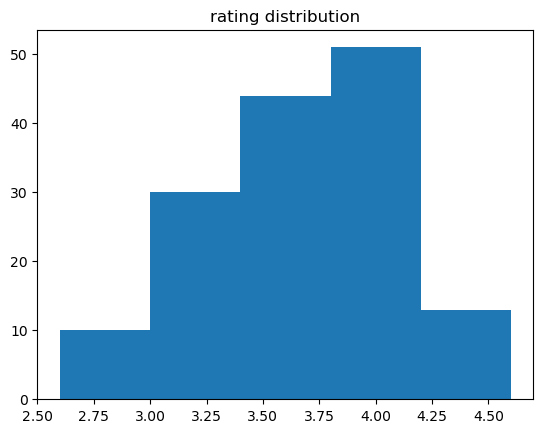

In [25]:
#Conclusion : Dinning is receiving more votes

# what are the rating that the majority of the restaurants have received?

plt.hist(df['rate'], bins =5)
plt.title("rating distribution")
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

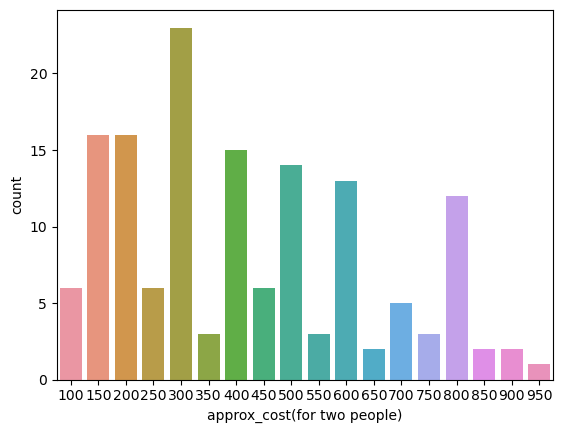

In [26]:
#conclusion: The majority rating received between 3.5 and 4

#Zomato has observed that most couples order most of their food online. what is their avg spending on the order?

couple_data= df['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [27]:
#Conclusion: couples spend more on 300/-

<Axes: xlabel='online_order', ylabel='rate'>

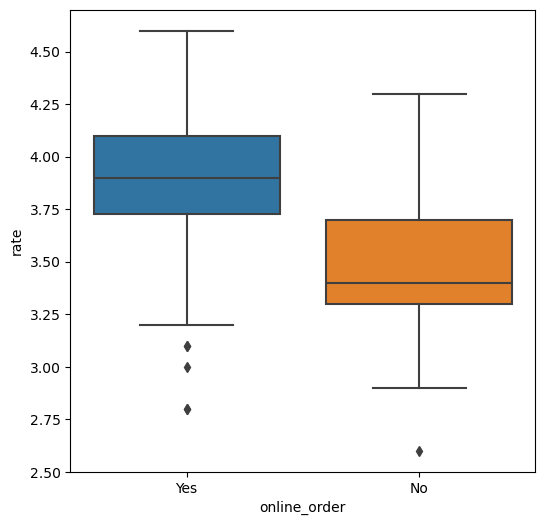

In [28]:
#which mode has rcvd the max rating (online or offline)

plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y='rate', data= df)


In [29]:
#Conclusion: offline needs area of improvement as it get less ratings

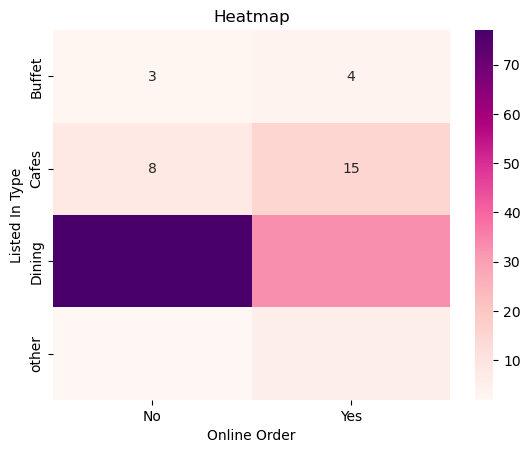

In [37]:
# which types of rest rcvd more offline orders so that Zomato can give cx with some good offers

pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc= 'size', fill_value=0)
sns.heatmap(pivot_table, cmap= 'RdPu', annot=True, fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In Type")
plt.show()

In [ ]:
# Conclusion: Dinning accepts offline and cafes accepts online orders. this suggest customer prefer online order.